<a href="https://colab.research.google.com/github/Zedbog/Data_science_course/blob/main/Klasteryzacja_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [ ]:
rnd = RandomState(25)
x1 = sorted(list(rnd.normal(1.0, 0.5, size=100)))
y1 = list(rnd.normal(2.0, 0.4, size=100))
x2 = sorted(list(rnd.normal(2.0, 0.3, size=100)))
y2 = list(rnd.normal(4.0, 0.4, size=100))
x3 = sorted(list(rnd.normal(2.5, 0.4, size=100)))
y3 = list(rnd.normal(2.0, 0.5, size=100))
x4 = sorted(list(rnd.normal(0.5, 0.4, size=100)))
y4 = list(rnd.normal(4.0, 0.5, size=100))

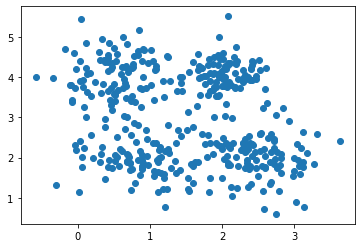

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x1+x2+x3+x4, y1+y2+y3+y4)
plt.show()

In [ ]:
models = []
# First situation - 1 cluster:
first_model = [(x1+x2+x3+x4, y1+y2+y3+y4)]

# Second situation - 2 clusters:
second_model = [(x1+x3+x4, y1+y3+y4), (x2,y2)]

# Third situation - 3 clusters:
third_model = [(x1+x4, y1+y4), (x2, y2), (x3, y3)]

# Fourth situation - 4 clusters:
fourth_model = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]

# Fifth  situation - 5 clusters:
fifth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
                (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
                (x2, y2), (x3, y3), (x4, y4)]

# Sixth situation - 6 clusters:
sixth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3, y3), (x4, y4)]

# Seventh situation - 7 clusters:
seventh_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]), 
               (x3[int(len(x3)/2):], y3[int(len(y3)/2):]),
               (x4, y4)]
# Eight situation - 8 clusters:
eight_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]), 
               (x3[int(len(x3)/2):], y3[int(len(y3)/2):]),
               (x4[int(len(x4)/2):], y4[int(len(y4)/2):])]
models = [first_model, second_model, third_model, 
          fourth_model, fifth_model, sixth_model,
          seventh_model, eight_model]

In [ ]:
def show_clusters(clusters):
  fig, ax = plt.subplots()
  print(len(clusters))
  for x,y in clusters:
    ax.scatter(x, y)
  plt.show()

5


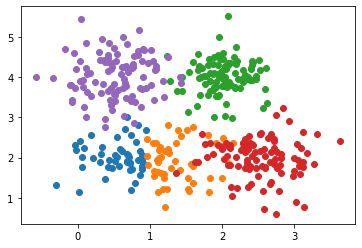

In [ ]:
show_clusters(fifth_model)

In [ ]:
def sse(clusters):
    result = 0
    for xs, ys in clusters:
        distance = calculate_distance(xs, ys)
        result += distance / len(xs)
    return result
        
def calculate_distance(xs, ys):
    result = 0
    for x1, y1 in zip(xs, ys):
        for x2, y2 in zip(xs, ys):
            result += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return result

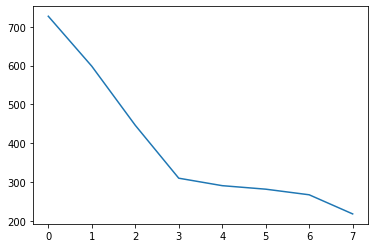

In [ ]:
distances = []
for model in models:
  distances.append(sse(model))


plt.plot(list(range(len(distances))), distances)
plt.show()

# Silhouette

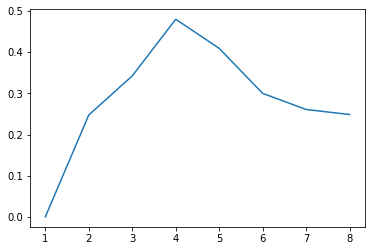

In [ ]:
def dist_to_cluster(point, cluster):
    x_i, y_i = point
    xs, ys = cluster
    distances = 0
    for x_j, y_j in zip(xs, ys):
        distances += np.sqrt((x_j - x_i)**2 + (y_j - y_i)**2)
    return distances

def a(point, cluster):
    distances = dist_to_cluster(point, cluster)
    return 1 / (len(cluster[0]) - 1) * distances

def b(point, other_clusters):
    x_i, y_i = point
    result = [1 / len(cluster[0]) * dist_to_cluster(point, cluster) 
              for cluster 
              in other_clusters]
    return min(result)

def silhouette(point, cluster, other_clusters):
    if len(cluster) == 1:
        return 0
    else:
        ar = a(point, cluster)
        br = b(point, other_clusters)
        return (br - ar) / max(ar, br)

def global_silhouette(clusters):
  if len(clusters) == 1:
    return 0
  results = []
  for key, cluster in clusters.items():
      other_clusters = [c for k, c in clusters.items() if k != key]
      for point in zip(*cluster):
          s = silhouette(point, cluster, other_clusters)
          results.append(s)
  return np.mean(results)

sil = []
for model in models:
  to_dict = {}
  for index, cluster in enumerate(model):
    to_dict[index] = cluster
  
  returned = global_silhouette(to_dict)
  sil.append(returned)

plt.plot(list(range(1, len(sil)+1)), sil)
plt.show()

Podział na 4 klastry jest najrozsądniejszy z uwagi na to, że Silhouette przyjmuje wówczas wartość największą.

# Davies–Bouldin index

In [ ]:
from itertools import permutations

In [ ]:
def dist_from_centroid(centroid, xs, ys):
  return np.mean([np.sqrt((centroid[0] - xs)**2 + (centroid[1] - ys)**2)])

def dist_between_centroids(point1, point2):
  return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def davies_bouldin(clusters):
  if len(clusters)  == 1:
    return None
  centroids = [(np.mean(x), np.mean(y)) for x, y in clusters.values()]

  di_per_cluster = [dist_from_centroid(centroid, xs, ys) for centroid, (xs, ys) in zip(centroids, clusters.values())]

  clusters_data = [(centroid, di) for centroid, di in zip(centroids, di_per_cluster)]

  Dij_list = []
  for cluster_data in clusters_data:
    temp = [cluster for cluster in clusters_data if cluster != cluster_data]
    Dij = []
    for other_cluster in temp:
      dij = dist_between_centroids(other_cluster[0], cluster_data[0])
      Dij.append(other_cluster[1] + cluster_data[1]/dij)
    max_Dij = max(Dij)
    Dij_list.append(max_Dij)

  return sum(Dij_list)/len(clusters)

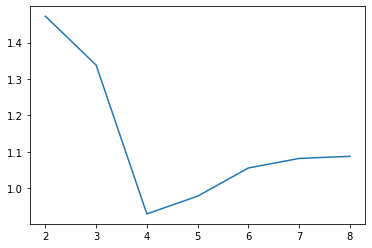

In [ ]:
db = []
for model in models:
  to_dict = {}
  for index, cluster in enumerate(model):
    to_dict[index] = cluster
  returned = davies_bouldin(to_dict)
  db.append(returned)

plt.plot(list(range(1, len(db) +  1)), db)
plt.show()

Im mniejsze DB tym lepiej - tu widać, że wybór 4 klastrów jest najlepszy.

# Sesja 2 - kalsteryzacja dla zbioru Iris

In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 71 (delta 16), reused 59 (delta 12), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [ ]:
def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

iris, iris_classes = load_dataset('iris', 'species')

y = iris.pop('class')
X = iris

In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

# Wizualizacja danych

In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv('ML-datasets/iris.csv',index_col=None)

In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


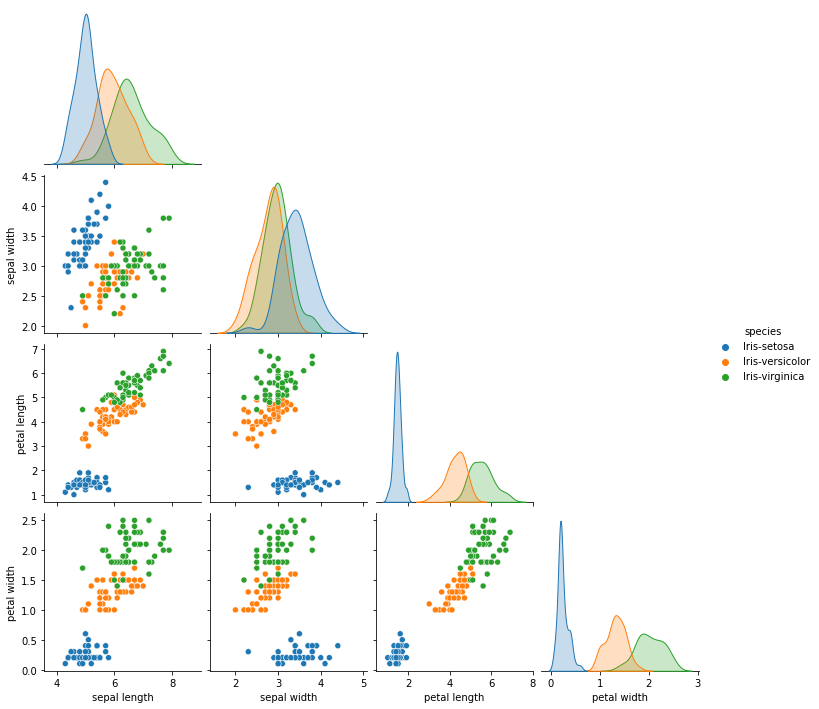

In [ ]:
sns.pairplot(data, hue='species', corner=True)

# KMeans

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

In [ ]:
# Create a KMeans instance with 3 clusters: model
kmeans = KMeans(n_clusters=3, init='k-means++')

# Use fit_predict to fit model and obtain cluster labels: labels
labels = kmeans.fit_predict(X)

# Create a DataFrame with lables and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          50   0   0
1           0  48  14
2           0   2  36


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


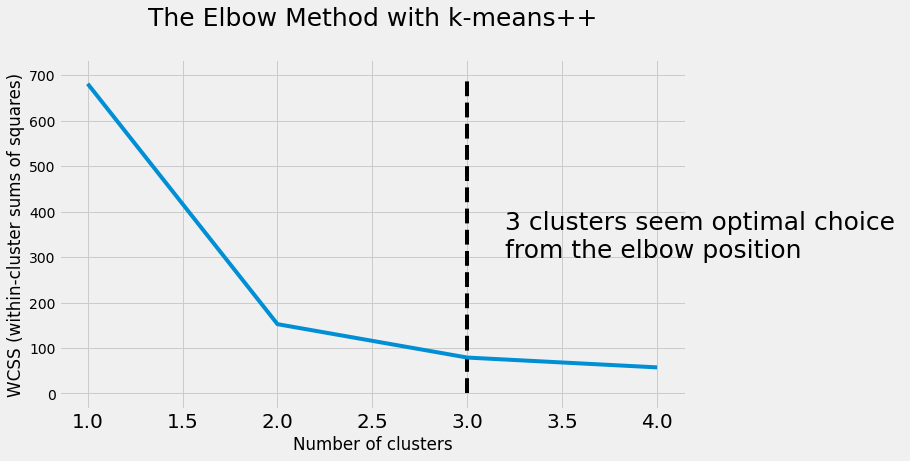

In [ ]:
# Verifying the optimal number of clusters by k-means algorithm
# Wyznaczenie within-cluster-sum-of-squares (WCSS) - metoda elbow
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 5), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=3,ymin=0,ymax=700,linestyles='--')
    plt.text(x=3.2,y=300,s='3 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

In [ ]:
# Sprawdzenei odchylenia standardowego dla poszczególnych kolumn
for column in X:
    print(X[column].var())

0.6856935123042505
0.1899794183445188
3.1162778523489942
0.5810062639821029


# GaussianMixture

In [ ]:
# Gaussian Mixture Models
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(X)

df = pd.DataFrame({'labels': labels, 'varieties': y})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties   0   1   2
labels               
0           0   5  50
1          50   0   0
2           0  45   0


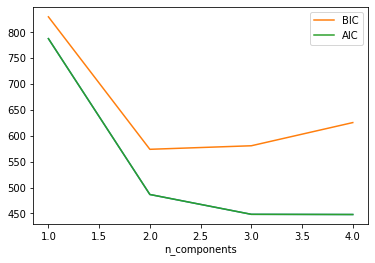

In [ ]:
# Poszukiwanie optymalnej liczby n_components dla modelu gmm
n_components = np.arange(1, 5, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=42) for n in n_components]
aics = [model.fit(X).aic(X) for model in models]
bics = [model.fit(X).bic(X) for model in models]
plt.plot(n_components, aics);
plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.75)
labels = dbscan.fit_predict(X)

df = pd.DataFrame({'labels': labels, 'varieties': y})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties   0   1   2
labels               
-1          0   0   2
 0         50   0   0
 1          0  50  48


# Klasteryzacja hierarchiczna

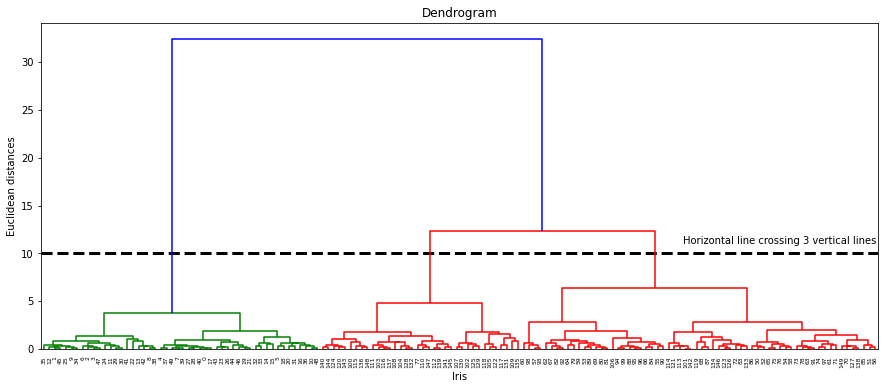

In [ ]:
import scipy.cluster.hierarchy as sch

# Zobrazowanie dendogramu w celu weryfikacji optymalnego doboru liczby klastrów
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
#plt.grid(True)
plt.hlines(y=10,xmin=0,xmax=1500,lw=3,linestyles='--')
plt.text(x=1150,y=11,s='Horizontal line crossing 3 vertical lines',fontsize=10)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), leaf_rotation=90, leaf_font_size=6)
plt.show()

In [ ]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hac = AgglomerativeClustering(n_clusters = 3)
labels = hac.fit_predict(X)

df = pd.DataFrame({'labels': labels, 'varieties': y})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties   0   1   2
labels               
0           0  49  15
1          50   0   0
2           0   1  35


# Preprocessing danych i ewaluacja grupowania po przetworzeniu danych

In [ ]:
from sklearn import metrics

In [ ]:
# Standaryzacja
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create scaler: scaler
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [ ]:
# Normalizacja
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

In [ ]:
from sklearn.pipeline import make_pipeline

# Zestawienie wszystkich modeli
kmeans = KMeans(n_clusters=3, init='k-means++')
gmm = GaussianMixture(n_components=3)
dbscan = DBSCAN(eps=0.75)
hac = AgglomerativeClustering(n_clusters = 3, linkage='complete')

models = [kmeans, gmm, hac, dbscan]
preprocessing = [None, scaler, min_max_scaler, normalizer]

KMeans - NoneType
varieties   0   1   2
labels               
0          50   0   0
1           0  48  14
2           0   2  36

Adjusted Rand Index = 0.7302382722834697
Fowlkes Mallows Score = 0.8208080729114153
Silhouette Score = 0.5528190123564102
Calinski Harabaz Index = 561.62775662962

-------------------------------------------------
KMeans - StandardScaler
varieties   0   1   2
labels               
0           0  39  14
1           0  11  36
2          50   0   0

Adjusted Rand Index = 0.6201351808870379
Fowlkes Mallows Score = 0.7452105043132992
Silhouette Score = 0.5061527484935543
Calinski Harabaz Index = 505.9576312219013

-------------------------------------------------
KMeans - MinMaxScaler
varieties   0   1   2
labels               
0           0  47  14
1          50   0   0
2           0   3  36

Adjusted Rand Index = 0.7163421126838475
Fowlkes Mallows Score = 0.8112427991975698
Silhouette Score = 0.5495805406956198
Calinski Harabaz Index = 557.768920849239

--------

Text(0, 0.5, 'Calinski Harabaz Index')

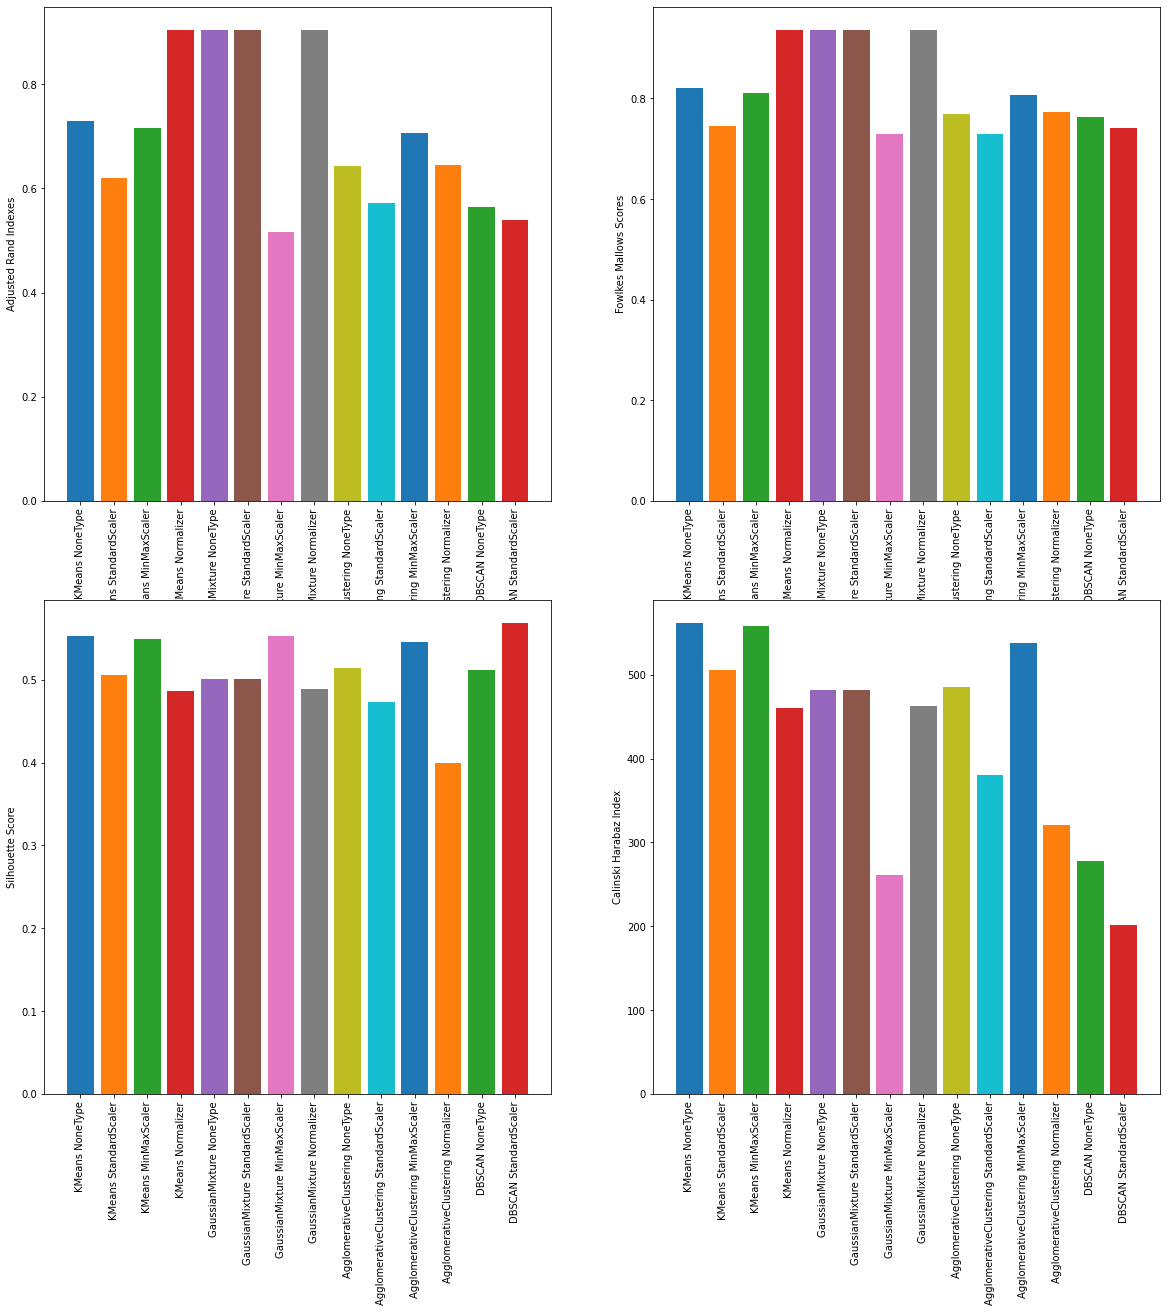

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))
for model in models:
  for preprocessor in preprocessing:
    pipeline = make_pipeline(preprocessor, model)
    labels = pipeline.fit_predict(X)
    df = pd.DataFrame({'labels': labels, 'varieties': y})
    ct = pd.crosstab(df['labels'], df['varieties'])
    if model == dbscan:
      if preprocessor == min_max_scaler or preprocessor == normalizer:
        break
    print(f'{model.__class__.__name__} - {preprocessor.__class__.__name__}\n{ct}\n')
    print(f'Adjusted Rand Index = {metrics.adjusted_rand_score(labels, y)}')  # 1 - najlepiej, -1 - najgorzej
    print(f'Fowlkes Mallows Score = {metrics.fowlkes_mallows_score(labels, y)}')  # ~= 'f1_score w klasyfikacji' - im bliżej 1 tym lepiej, im bliżej -1 tym gorzej
    print(f'Silhouette Score = {metrics.silhouette_score(X, labels)}')  # Silhouette Score - im bliżej 1 tym lepiej, im bliżej -1 tym gorzej
    print(f'Calinski Harabaz Index = {metrics.calinski_harabasz_score(X, labels)}\n')  # im więcej tym lepiej
    print(f'-------------------------------------------------')
    axs[0, 0].bar(model.__class__.__name__ + ' ' + preprocessor.__class__.__name__, metrics.adjusted_rand_score(labels, y))
    axs[0, 1].bar(model.__class__.__name__ + ' ' + preprocessor.__class__.__name__, metrics.fowlkes_mallows_score(labels, y))
    axs[1, 0].bar(model.__class__.__name__ + ' ' + preprocessor.__class__.__name__, metrics.silhouette_score(X, labels))
    axs[1, 1].bar(model.__class__.__name__ + ' ' + preprocessor.__class__.__name__, metrics.calinski_harabasz_score(X, labels))

# ax1
axs[0, 0].xaxis.set_tick_params(rotation=90)
axs[0, 0].set_ylabel("Adjusted Rand Indexes")

#ax2
axs[0, 1].xaxis.set_tick_params(rotation=90)
axs[0, 1].set_ylabel("Fowlkes Mallows Scores")

#ax3
axs[1, 0].xaxis.set_tick_params(rotation=90)
axs[1, 0].set_ylabel("Silhouette Score")

#ax4
axs[1, 1].xaxis.set_tick_params(rotation=90)
axs[1, 1].set_ylabel("Calinski Harabaz Index")

In [ ]:
preprocessing = [None, scaler]

In [ ]:
for preprocessor in preprocessing:
  pipeline = make_pipeline(preprocessor, dbscan)
  labels = pipeline.fit_predict(X)
  df = pd.DataFrame({'labels': labels, 'varieties': y})
  ct = pd.crosstab(df['labels'], df['varieties'])
  print(f'{model.__class__.__name__} - {preprocessor.__class__.__name__}\n{ct}\n')
  print(f'Adjusted Rand Index = {metrics.adjusted_rand_score(labels, y)}')  # 1 - najlepiej, -1 - najgorzej
  print(f'Fowlkes Mallows Score = {metrics.fowlkes_mallows_score(labels, y)}')  # ~= 'f1_score w klasyfikacji' - im bliżej 1 tym lepiej, im bliżej -1 tym gorzej
  print(f'Silhouette Score = {metrics.silhouette_score(X, labels)}')  # Silhouette Score - im bliżej 1 tym lepiej, im bliżej -1 tym gorzej
  print(f'Calinski Harabaz Index = {metrics.calinski_harabasz_score(X, labels)}\n')  # im więcej tym lepiej
  print(f'-------------------------------------------------')

DBSCAN - NoneType
varieties   0   1   2
labels               
-1          0   0   2
 0         50   0   0
 1          0  50  48

Adjusted Rand Index = 0.5637510205230709
Fowlkes Mallows Score = 0.7635170681000877
Silhouette Score = 0.5121107753649314
Calinski Harabaz Index = 277.99467626461944

-------------------------------------------------
DBSCAN - StandardScaler
varieties   0   1   2
labels               
-1          2   0   4
 0         48   0   0
 1          0  50  46

Adjusted Rand Index = 0.5400773829118303
Fowlkes Mallows Score = 0.7415824119198279
Silhouette Score = 0.5683212008559984
Calinski Harabaz Index = 200.86004279964473

-------------------------------------------------


In [ ]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram

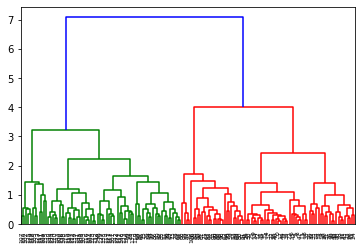

In [ ]:
# Calculate the linkage: mergings
mergings = linkage(X, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=iris.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()